# Optimización de funciones

## ¿Qué es la optimización?

### Encontrar máximos y/o mínimos

![](https://upload.wikimedia.org/wikipedia/commons/thumb/7/72/Max_paraboloid.svg/1200px-Max_paraboloid.svg.png)
Fuente: wikipedia

![](http://www.disfrutalasmatematicas.com/calculo/images/function-max.svg)


In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import bracket

def f(x):
    return 10*x**2 + 3*x + 5

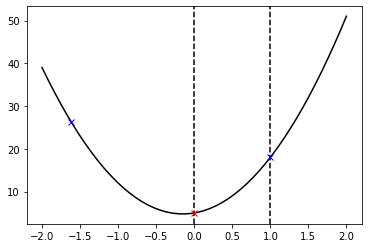

In [10]:
x = np.linspace(-2, 2)
y = f(x)

init_xa, init_xb = 0, 1
xa, xb, xc, fa, fb, fc, funcalls = bracket(f, xa=init_xa, xb=init_xb)
plt.axvline(x=init_xa, color="k", linestyle="--")
plt.axvline(x=init_xb, color="k", linestyle="--")
plt.plot(x, y, "-k")
plt.plot(xa, fa, "bx")
plt.plot(xb, fb, "rx")
plt.plot(xc, fc, "bx")

plt.show()

In [4]:
# optimize convex objective function
from numpy import arange
from scipy.optimize import minimize_scalar
from matplotlib import pyplot

In [7]:
# objective function
def objective(x):
    return (x - 2.0) * x * (x + 2.0)**2.0

Optimal Input x: 1.280776
Optimal Output f(x): -9.914950
Total Evaluations n: 14


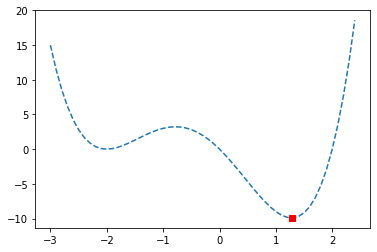

In [8]:
# minimize the function
result = minimize_scalar(objective, method='brent')
# summarize the result
opt_x, opt_y = result['x'], result['fun']
print('Optimal Input x: %.6f' % opt_x)
print('Optimal Output f(x): %.6f' % opt_y)
print('Total Evaluations n: %d' % result['nfev'])
# define the range
r_min, r_max = -3.0, 2.5
# prepare inputs
inputs = arange(r_min, r_max, 0.1)
# compute targets
targets = [objective(x) for x in inputs]
# plot inputs vs target
pyplot.plot(inputs, targets, '--')
# plot the optima
pyplot.plot([opt_x], [opt_y], 's', color='r')
# show the plot
pyplot.show()

## Algunas desventajas de los métodos de scipy.optimize

- Sensibles a las condiciones iniciales.
- Se atascan en máximos locales.
- Algunos requieren cálculo de derivadas.
- Algunos calculan segundas derivadas.
- Tienen problemas con altas dimensiones, se deben calcular hessianos.

## ¿Para qué sirve la optimización?

![](https://miro.medium.com/v2/resize:fit:720/format:webp/1*44DntoT9xYkMzrSrDWlrxw.jpeg)
Fuente: https://towardsdatascience.com/optimization-with-scipy-and-application-ideas-to-machine-learning-81d39c7938b8

## Utilidad en Aprendizaje Automático

![](https://miro.medium.com/v2/resize:fit:4800/format:webp/1*w1LDt6OfwKdVLWrN8d69Gg.png)
Fuente: https://towardsdatascience.com/optimization-with-scipy-and-application-ideas-to-machine-learning-81d39c7938b8